In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy

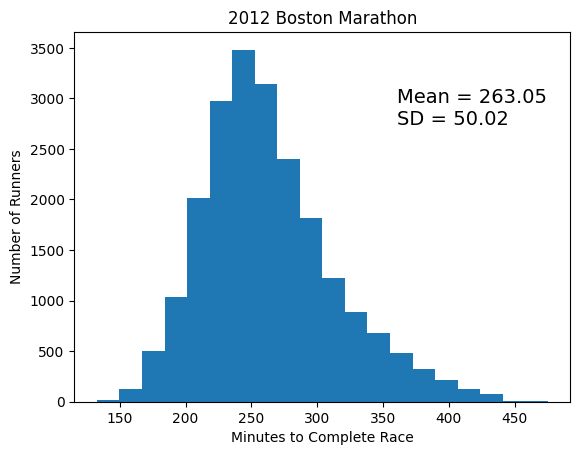

In [2]:
def get_BM_data(filename):


    data = {}
    with open(filename, 'r') as f:
        f.readline() #discard first line
        line = f.readline()
        for k in ('name', 'gender', 'age', 'division',
                  'country', 'time'):
            data[k] = []
        while line != '':
            split = line.split(',')
            data['name'].append(split[0])
            data['gender'].append(split[1])
            data['age'].append(int(split[2]))
            data['division'].append(int(split[3]))
            data['country'].append(split[4])
            data['time'].append(float(split[5][:-1]))
            line = f.readline()
    return data

def make_hist(data, bins, title, xLabel, yLabel):
    plt.hist(data, bins)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    mean = sum(data)/len(data)
    std = np.std(data)
    plt.annotate('Mean = ' + str(round(mean, 2)) +
              '\nSD = ' + str(round(std, 2)), fontsize = 14,
              xy = (0.65, 0.75), xycoords = 'axes fraction')

times = get_BM_data('bm_results2012.csv')['time']
make_hist(times, 20, '2012 Boston Marathon',
          'Minutes to Complete Race', 'Number of Runners')

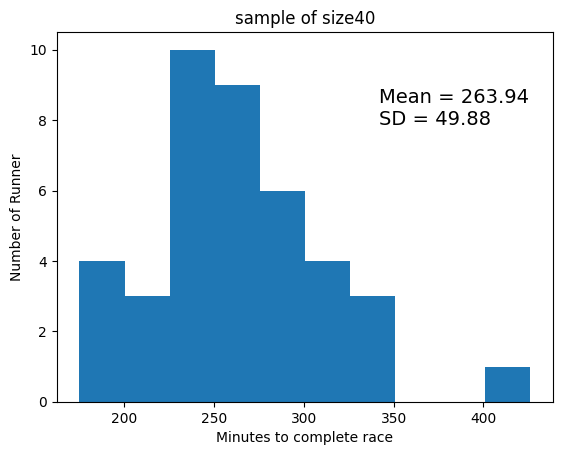

In [3]:
def sample_times(time, num_examples):
    sample = random.sample(times, num_examples)

    make_hist(sample, 10, 'sample of size' + str(num_examples), 'Minutes to complete race', 'Number of Runner')

sample_size = 40
sample_times(times, sample_size)

In [9]:
def gaussian(x, mu, sigma):
    factor1 = (1/(sigma*((2*np.pi)**0.5)))
    factor2 = np.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 1))[0], 4)
print('Probability of being within 3',
      'of true mean of tight dist. =', area)
area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 100))[0], 4)
print('Probability of being within 3',
      'of true mean of wide dist. =', area)

Probability of being within 3 of true mean of tight dist. = 0.9973
Probability of being within 3 of true mean of wide dist. = 0.0239


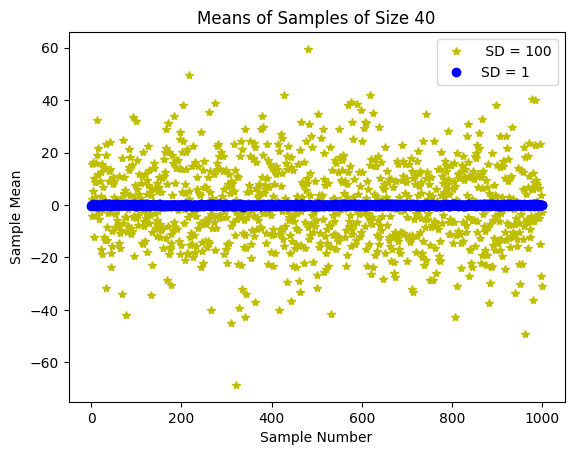

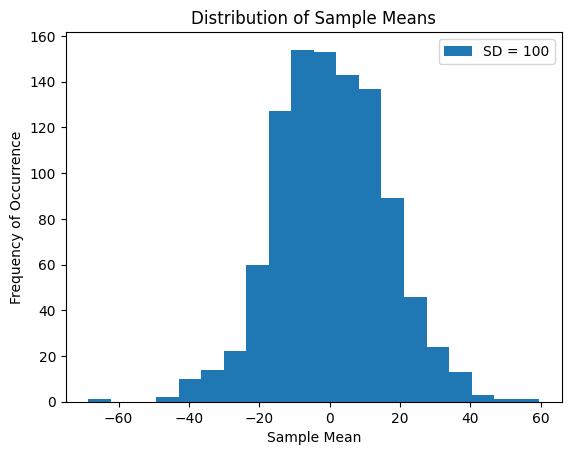

In [10]:
def test_samples(num_trials, sample_size):
    tight_means, wide_means = [], []
    for t in range(num_trials):
        sample_tight, sample_wide = [], []
        for i in range(sample_size):
            sample_tight.append(random.gauss(0, 1))
            sample_wide.append(random.gauss(0, 100))
        tight_means.append(sum(sample_tight)/len(sample_tight))
        wide_means.append(sum(sample_wide)/len(sample_wide))
    return tight_means, wide_means

tight_means, wide_means = test_samples(1000, 40)
plt.plot(wide_means, 'y*', label = ' SD = 100')
plt.plot(tight_means, 'bo', label = 'SD = 1')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.title('Means of Samples of Size ' + str(40))
plt.legend()

plt.figure()
plt.hist(wide_means, bins = 20, label = 'SD = 100')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency of Occurrence')
plt.legend()

Mean of rolling 1 die = 2.4995 Variance = 2.0859
Mean of rolling 100 dice = 2.4989 Variance = 0.0208


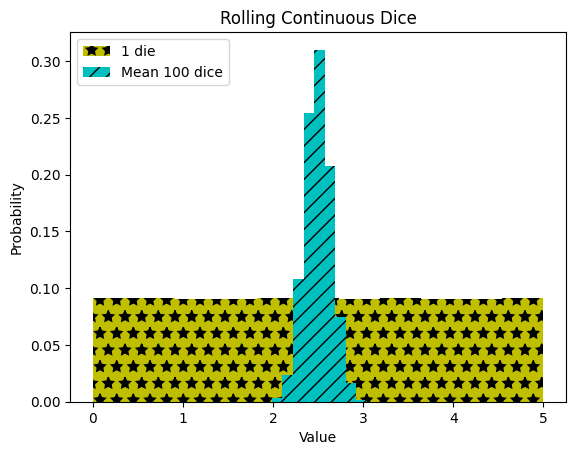

In [11]:
def plot_means(num_dice_per_trial, num_dice_thrown, num_bins,
              legend, color, style):
    means = []
    num_trials = num_dice_thrown//num_dice_per_trial
    for i in range(num_trials):
        vals = 0
        for j in range(num_dice_per_trial):
            vals += 5*random.random()
        means.append(vals/num_dice_per_trial)
    plt.hist(means, num_bins, color = color, label = legend,
               weights = np.array(len(means)*[1])/len(means),
               hatch = style)
    return sum(means)/len(means), np.var(means)

mean, var = plot_means(1, 1000000, 11, '1 die', 'y', '*')
print('Mean of rolling 1 die =', round(mean,4),
      'Variance =', round(var,4))
mean, var = plot_means(100, 1000000, 11,
                      'Mean 100 dice', 'c', '//')
print('Mean of rolling 100 dice =', round(mean, 4),
      'Variance =', round(var, 4))
plt.title('Rolling Continuous Dice')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(loc = 'upper left')

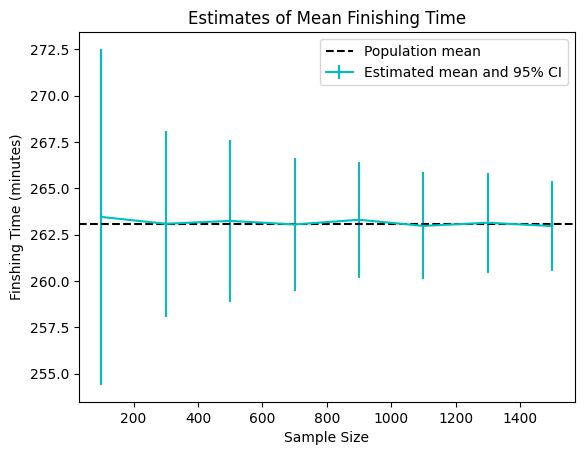

In [12]:
times = get_BM_data('bm_results2012.csv')['time']
mean_of_means, std_of_means = [], []
sample_sizes = range(100, 1501, 200)
for sample_size in sample_sizes:
    sample_means = []
    for t in range(200):
        sample = random.sample(times, sample_size)
        sample_means.append(sum(sample)/sample_size)
    mean_of_means.append(sum(sample_means)/len(sample_means))
    std_of_means.append(np.std(sample_means))
plt.errorbar(sample_sizes, mean_of_means, color = 'c',
                yerr = 1.96*np.array(std_of_means),
                label = 'Estimated mean and 95% CI')
plt.axhline(sum(times)/len(times), linestyle = '--', color = 'k',
            label = 'Population mean')
plt.title('Estimates of Mean Finishing Time')
plt.xlabel('Sample Size')
plt.ylabel('Finshing Time (minutes)')
plt.legend(loc = 'best')